<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(0_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.8_n20.csv',
 'data_multi_delta_0.8_n250.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n120.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,52.165738,11.468609,73.634347,61.898645,11.735702
1,0.0,1.0,97.995210,-5.613893,102.381318,106.602304,-4.220986
2,0.0,2.0,78.654944,-4.637278,84.017666,87.737137,-3.719471
3,0.0,3.0,85.490441,1.978314,97.468755,94.404717,3.064037
4,0.0,4.0,45.689186,3.063539,58.752726,55.581192,3.171534
...,...,...,...,...,...,...,...
59995,999.0,55.0,69.579291,4.145279,83.724569,78.288762,5.435808
59996,999.0,56.0,62.459660,-1.037521,71.422140,71.374481,0.047659
59997,999.0,57.0,44.052724,-6.621296,47.431428,53.498452,-6.067023
59998,999.0,58.0,37.902249,3.891815,51.794064,47.525373,4.268691


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,52.165738,11.468609,73.634347,61.898645,11.735702
1,0.0,1.0,97.995210,-5.613893,102.381318,106.602304,-4.220986
2,0.0,2.0,78.654944,-4.637278,84.017666,87.737137,-3.719471
3,0.0,3.0,85.490441,1.978314,97.468755,94.404717,3.064037
4,0.0,4.0,45.689186,3.063539,58.752726,55.581192,3.171534
...,...,...,...,...,...,...,...
59995,999.0,55.0,69.579291,4.145279,83.724569,78.288762,5.435808
59996,999.0,56.0,62.459660,-1.037521,71.422140,71.374481,0.047659
59997,999.0,57.0,44.052724,-6.621296,47.431428,53.498452,-6.067023
59998,999.0,58.0,37.902249,3.891815,51.794064,47.525373,4.268691


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    52.165738  11.468609   73.634347   61.898645  11.735702
      1.0    97.995210  -5.613893  102.381318  106.602304  -4.220986
      2.0    78.654944  -4.637278   84.017666   87.737137  -3.719471
      3.0    85.490441   1.978314   97.468755   94.404717   3.064037
      4.0    45.689186   3.063539   58.752726   55.581192   3.171534
...                ...        ...         ...         ...        ...
999.0 55.0   69.579291   4.145279   83.724569   78.288762   5.435808
      56.0   62.459660  -1.037521   71.422140   71.374481   0.047659
      57.0   44.052724  -6.621296   47.431428   53.498452  -6.067023
      58.0   37.902249   3.891815   51.794064   47.525373   4.268691
      59.0   26.873652  -1.756043   35.117610   36.814871  -1.697261

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    52.165738  11.468609   73.634347   61.898645  11.735702
      1.0    97.995210  -5.613893  102.381318  106.602304  -4.220986
      2.0    78.654944  -4.637278   84.017666   87.737137  -3.719471
      3.0    85.490441   1.978314   97.468755   94.404717   3.064037
      4.0    45.689186   3.063539   58.752726   55.581192   3.171534
...                ...        ...         ...         ...        ...
999.0 55.0   69.579291   4.145279   83.724569   78.288762   5.435808
      56.0   62.459660  -1.037521   71.422140   71.374481   0.047659
      57.0   44.052724  -6.621296   47.431428   53.498452  -6.067023
      58.0   37.902249   3.891815   51.794064   47.525373   4.268691
      59.0   26.873652  -1.756043   35.117610   36.814871  -1.697261

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,52.165738,11.468609,73.634347,61.898645,11.735702
1,0.0,1.0,97.995210,-5.613893,102.381318,106.602304,-4.220986
2,0.0,2.0,78.654944,-4.637278,84.017666,87.737137,-3.719471
3,0.0,3.0,85.490441,1.978314,97.468755,94.404717,3.064037
4,0.0,4.0,45.689186,3.063539,58.752726,55.581192,3.171534
...,...,...,...,...,...,...,...
59995,999.0,55.0,69.579291,4.145279,83.724569,78.288762,5.435808
59996,999.0,56.0,62.459660,-1.037521,71.422140,71.374481,0.047659
59997,999.0,57.0,44.052724,-6.621296,47.431428,53.498452,-6.067023
59998,999.0,58.0,37.902249,3.891815,51.794064,47.525373,4.268691


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    52.165738  11.468609   73.634347   61.898645  11.735702
      1.0    97.995210  -5.613893  102.381318  106.602304  -4.220986
      2.0    78.654944  -4.637278   84.017666   87.737137  -3.719471
      3.0    85.490441   1.978314   97.468755   94.404717   3.064037
      4.0    45.689186   3.063539   58.752726   55.581192   3.171534
...                ...        ...         ...         ...        ...
999.0 55.0   69.579291   4.145279   83.724569   78.288762   5.435808
      56.0   62.459660  -1.037521   71.422140   71.374481   0.047659
      57.0   44.052724  -6.621296   47.431428   53.498452  -6.067023
      58.0   37.902249   3.891815   51.794064   47.525373   4.268691
      59.0   26.873652  -1.756043   35.117610   36.814871  -1.697261

[60000 rows x 5 columns]

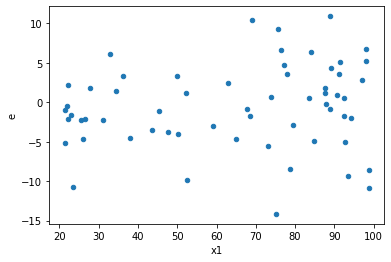

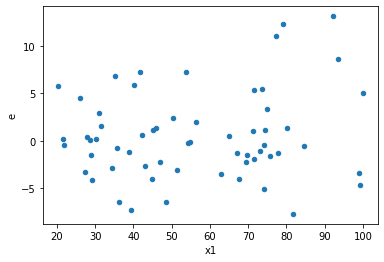

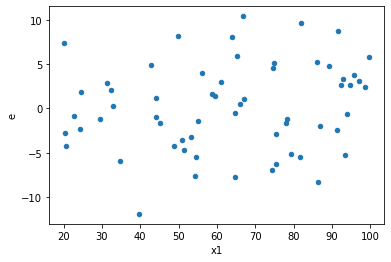

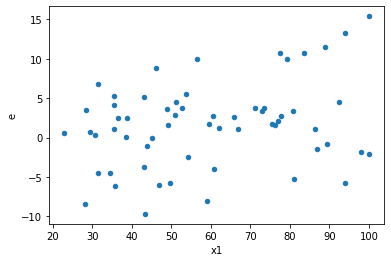

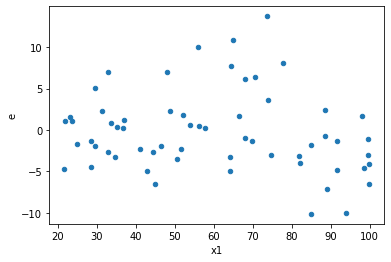

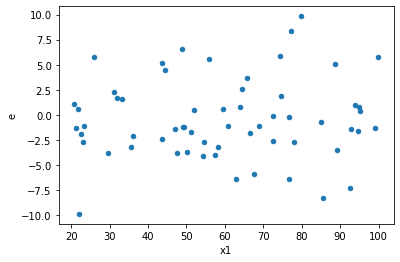

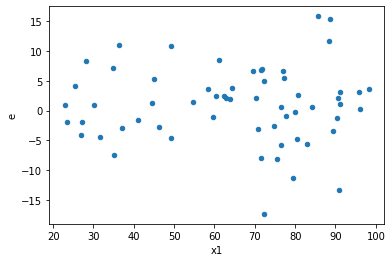

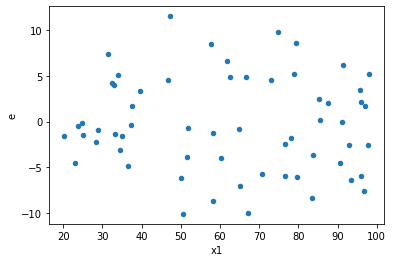

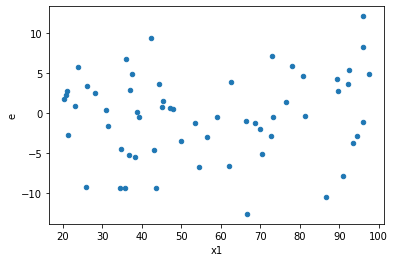

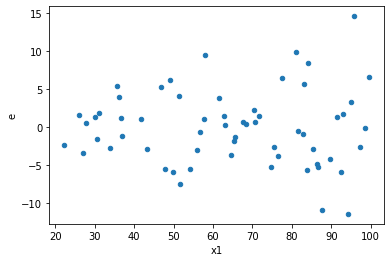

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,23.0,23.0,480.81109393386043,567.7259782592378,20.90483017103741,24.68373818518425,1.1807672190220577,0.6936413966219082,0.6531793016890459,0.3468206983109541,Reject005=1 : Homoscedasticity
1.0,23.0,23.0,238.98654268804012,889.4507261896325,10.390719247306093,38.67177070389707,3.721760715835253,0.002561491889952583,0.9987192540550237,0.0012807459449762915,Reject005=0 : Heteroscedasticity
2.0,23.0,23.0,493.77953345425385,560.0400629413159,21.468675367576253,24.349567953970258,1.1341905141825828,0.7652582876925211,0.6173708561537394,0.38262914384626057,Reject005=1 : Homoscedasticity
3.0,23.0,23.0,477.86095068796106,770.6188314211678,20.77656307338961,33.50516658352903,1.6126424021710344,0.2592134861405859,0.870393256929707,0.12960674307029296,Reject005=1 : Homoscedasticity
4.0,23.0,23.0,424.0374061470227,662.3832839796063,18.43640896291403,28.79927321650462,1.5620869158650217,0.29203042793358236,0.8539847860332088,0.14601521396679118,Reject005=1 : Homoscedasticity
6.0,23.0,23.0,339.396895996343,1060.1987981762702,14.756386782449695,46.0955999207074,3.123772817850679,0.008428049425469375,0.9957859752872653,0.0042140247127346875,Reject005=0 : Heteroscedasticity
8.0,23.0,23.0,412.12165289617707,588.228559899414,17.918332734616396,25.57515477823539,1.4273177732003377,0.39991940381415936,0.8000402980929203,0.19995970190707968,Reject005=1 : Homoscedasticity
9.0,23.0,23.0,275.8708475798419,1212.8682680365173,11.99438467738443,52.733402958109444,4.396507563871865,0.0007494852050939915,0.999625257397453,0.00037474260254699576,Reject005=0 : Heteroscedasticity
10.0,23.0,23.0,351.2890664513489,719.1720280031043,15.273437671797778,31.26834904361323,2.0472371522064,0.09256039518933923,0.9537198024053304,0.046280197594669614,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,480.81109393386043,567.7259782592378,20.90483017103741,24.68373818518425,1.1807672190220577,0.6936413966219082,Reject005=1 : Homoscedasticity
1.0,23.0,23.0,238.98654268804012,889.4507261896325,10.390719247306093,38.67177070389707,3.721760715835253,0.002561491889952583,Reject005=0 : Heteroscedasticity
2.0,23.0,23.0,493.77953345425385,560.0400629413159,21.468675367576253,24.349567953970258,1.1341905141825828,0.7652582876925211,Reject005=1 : Homoscedasticity
3.0,23.0,23.0,477.86095068796106,770.6188314211678,20.77656307338961,33.50516658352903,1.6126424021710344,0.2592134861405859,Reject005=1 : Homoscedasticity
4.0,23.0,23.0,424.0374061470227,662.3832839796063,18.43640896291403,28.79927321650462,1.5620869158650217,0.29203042793358236,Reject005=1 : Homoscedasticity
5.0,23.0,23.0,499.13766035264246,433.6438786832792,21.701637406636628,18.854081681881702,0.8687861348248263,0.7387525748450998,Reject005=1 : Homoscedasticity
6.0,23.0,23.0,339.396895996343,1060.1987981762702,14.756386782449695,46.0955999207074,3.123772817850679,0.008428049425469375,Reject005=0 : Heteroscedasticity
7.0,23.0,23.0,459.4807102452285,455.07868994233775,19.977422184575154,19.786029997492946,0.9904195753929661,0.9817824579755521,Reject005=1 : Homoscedasticity
8.0,23.0,23.0,412.12165289617707,588.228559899414,17.918332734616396,25.57515477823539,1.4273177732003377,0.39991940381415936,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      665
Reject005=0 : Heteroscedasticity    335
Name: Result_test, dtype: int64